# Gradient Descent

In this notebook, we implement **gradient descent** to optimize convex functions (Single-variable scene and Muliti-variable scene).

## Algorithm Inplement 

---

### Single-variable scene

With this single-variable gradient descent defined we now consider the function $f(w) = (w-2)^2 -2w + 8$. To visualize this function run the following code in the cell below.

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define test function for experimenting
def f(w):
    return (w - 2)**2 - 2*w + 8

# Define parabola derivative
def df(w): 
    return 2*(w - 2)-2

# Define function of updating wi process iterately
def derivative_descent(derivative, alpha, w_0, max_iter):
    W = [w_0]
    i = 0
    while abs(derivative(W[-1])) > 0.001 and i < max_iter:
        w_new = W[-1] - alpha*df(W[-1])
        W.append(w_new)
        i += 1
    W = np.array(W)

    return W

# Define tangent line function for visualization
def tangent_line(w_i, function, derivative, i = 0, color = "magenta", show = True):
    # Define tangent line
    # y = m*(x - x1) + y1
    def line(w):
        return derivative(w_i)*(w - w_i) + function(w_i)

    wrange = np.linspace(w_i - 1, w_i + 1, 10)
    if show:
        plt.plot(wrange,
            line(wrange), 
            '--', 
            linewidth = 1.5, 
            color = "red", 
            label = "tangent line")
    plt.scatter([w_i], [function(w_i)], color = color, label = f"(w_{i}, f(w_{i}))")

w_0 = 4.0 | df(w_0) = 2.0
w_1 = 2.4 | df(w_1) = -1.2000000000000002
w_2 = 3.36 | df(w_2) = 0.7200000000000006
w_3 = 2.78 | df(w_3) = -0.4320000000000004
w_4 = 3.13 | df(w_4) = 0.2591999999999999
w_5 = 2.92 | df(w_5) = -0.1555200000000001
w_6 = 3.05 | df(w_6) = 0.09331200000000006
w_7 = 2.97 | df(w_7) = -0.05598719999999968
w_8 = 3.02 | df(w_8) = 0.033592319999999454
w_9 = 2.99 | df(w_9) = -0.020155391999999495
w_10 = 3.01 | df(w_10) = 0.012093235200000052
w_11 = 3.0 | df(w_11) = -0.0072559411200003865
w_12 = 3.0 | df(w_12) = 0.004353564671999877
w_13 = 3.0 | df(w_13) = -0.0026121388032001036
w_14 = 3.0 | df(w_14) = 0.0015672832819202398
w_15 = 3.0 | df(w_15) = -0.0009403699691521439


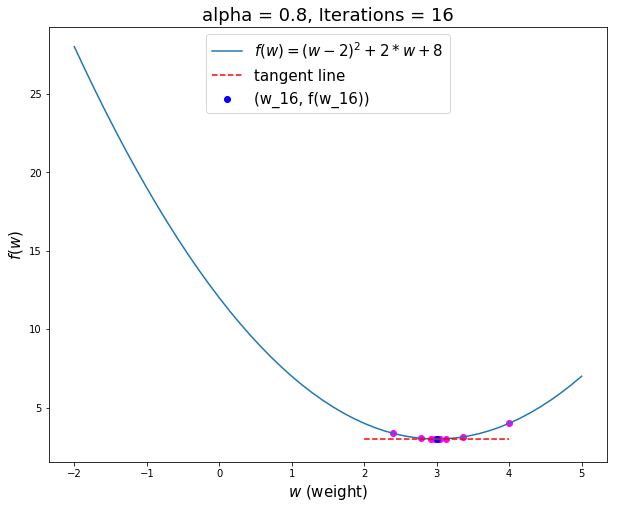

In [45]:
# Define alpha、w_0、max_itera
alpha = 0.8
w_0 = 4
max_itera = 100

# Define domain variables for plotting f
domain = np.linspace(-2, 5, 50)

W = derivative_descent(df, alpha, w_0, max_itera)

for i, w in enumerate(W):
    print(f"w_{i} = {np.round(w, decimals = 2)} | df(w_{i}) = {df(w)}")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 2*w + 8$")
plt.scatter(W, f(W), color = "magenta")

tangent_line(W[-1], f, df, i = len(W), color = "blue")

plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$f(w)$", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)
plt.show()

### Testing different choices of the Learning Rate $\alpha$

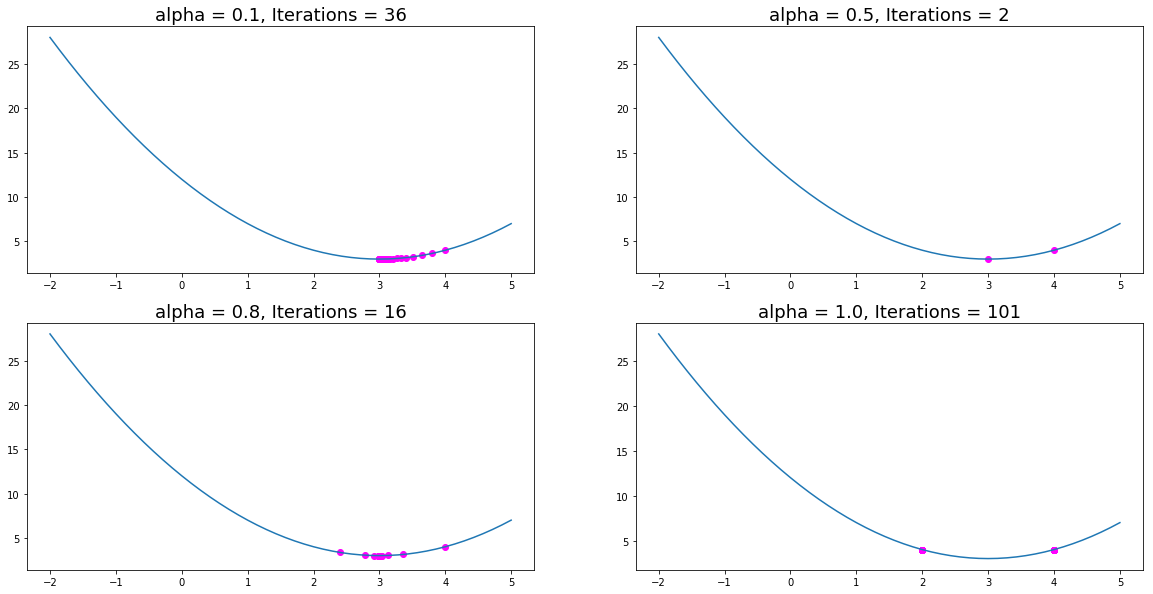

In [46]:
# Possible choices of learning rate 
alphas = [0.1, 0.5, 0.8, 1.0]

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(20,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    W = derivative_descent(df, alpha, w_0, max_itera)
    ax.plot(domain, f(domain))
    ax.scatter(W, f(W), color = "magenta")
    ax.set_title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)


### Muliti-variable scene

With this multivariable gradient descent defined we now consider the multivariable function $f(x, y) = x^2 + y^2 -2x + 1$. To visualize this function run the following code in the cell below.

In [47]:
from mpl_toolkits import mplot3d

def f(x, y):
    return x ** 2 + y ** 2 -2*x + 1

Now that we have a good visualization of our multivariable function we next define the derivative of our function and also update our gradient descent function to work with such functions. Next run the following code in the cell below.

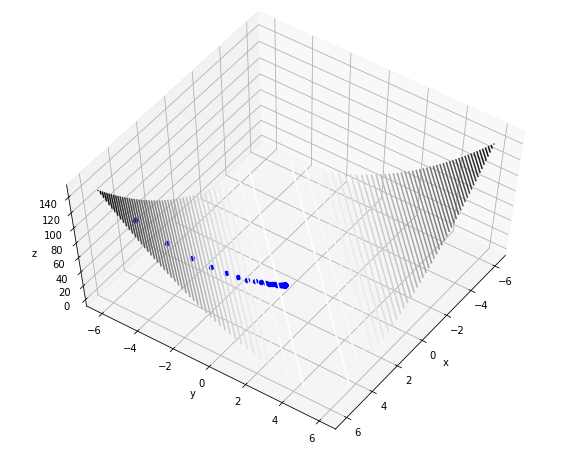

In [49]:
def df(w):
    grad = [2*w[0]-2, 2*w[1]]
    return np.array(grad)

def gradient_descent(derivative, W, alpha = 0.8, max_iter = 200):
    i = 0
    W_hist = [W]
    while i < max_iter:
        W = W - alpha*df(W)
        i += 1
        W_hist.append(W)

    return W_hist

W = gradient_descent(df, np.array([5.0, -5.0]), alpha = 0.1, max_iter=200)

x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
for i in range(len(W)):
    ax.scatter3D([W[i][0]], 
                 [W[i][1]], 
                 [f(W[i][0], W[i][1])], color = "blue")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 35)
plt.show()

## Conclusion

As we have demonstrated in this notebook, gradient descent is a simple way to optimize convex functions. The learning rate $\alpha$ has a significant influence on the optimizing process, larger paramerter value may cannot find the optimized piont.